In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [5]:
N = 20
X = np.random.random(N) * 10 - 5
Y = 0.5 * X - 1 + np.random.randn(N)

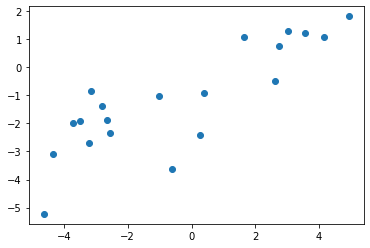

In [7]:
plt.scatter(X, Y);

In [8]:
# Create the linear regression model
model = nn.Linear(1, 1)

In [9]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [10]:
# (# samples) x (# features)
X = X.reshape(N, 1)
Y = Y.reshape(N, 1)

# PyTorch uses float32 by default
# Numpy uses float64 by default
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

In [11]:
type(inputs)

torch.Tensor

In [12]:
# Train the model
n_epochs = 30
losses = []
for i in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass
  outputs = model(inputs)
  loss = criterion(outputs, targets)

  # get the data from the tensor using the item function
  losses.append(loss.item())

  # Backward and optimize
  loss.backward()
  optimizer.step()

  print(f'Epoch {i+1}/{n_epochs}, Loss:{loss.item():.4f}')

Epoch 1/30, Loss:3.5402
Epoch 2/30, Loss:2.8558
Epoch 3/30, Loss:2.3774
Epoch 4/30, Loss:2.0384
Epoch 5/30, Loss:1.7950
Epoch 6/30, Loss:1.6175
Epoch 7/30, Loss:1.4862
Epoch 8/30, Loss:1.3878
Epoch 9/30, Loss:1.3129
Epoch 10/30, Loss:1.2552
Epoch 11/30, Loss:1.2103
Epoch 12/30, Loss:1.1750
Epoch 13/30, Loss:1.1470
Epoch 14/30, Loss:1.1247
Epoch 15/30, Loss:1.1067
Epoch 16/30, Loss:1.0922
Epoch 17/30, Loss:1.0804
Epoch 18/30, Loss:1.0708
Epoch 19/30, Loss:1.0630
Epoch 20/30, Loss:1.0566
Epoch 21/30, Loss:1.0513
Epoch 22/30, Loss:1.0470
Epoch 23/30, Loss:1.0435
Epoch 24/30, Loss:1.0406
Epoch 25/30, Loss:1.0382
Epoch 26/30, Loss:1.0362
Epoch 27/30, Loss:1.0346
Epoch 28/30, Loss:1.0333
Epoch 29/30, Loss:1.0322
Epoch 30/30, Loss:1.0313


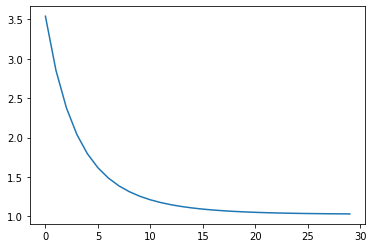

In [14]:
plt.plot(losses);

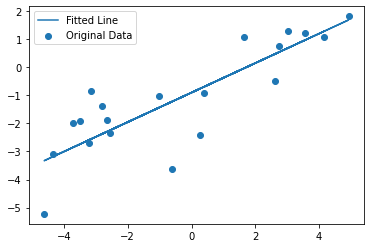

In [16]:
# detach() method in PyTorch is used to separate a tensor from the computational graph by returning a new tensor that doesn't require a gradient
predicted = model(inputs).detach().numpy()
plt.scatter(X, Y, label='Original Data')
plt.plot(X, predicted, label='Fitted Line')
plt.legend();

In [17]:
model(inputs).numpy()

RuntimeError: ignored

In [19]:
# torch.no_grad() does not compute gradients
with torch.no_grad():
  out = model(inputs).numpy()
out

array([[-0.6970084 ],
       [-2.560835  ],
       [-2.5944424 ],
       [ 1.282039  ],
       [ 0.54423046],
       [-0.76240903],
       [ 0.67833126],
       [-3.3289652 ],
       [-1.4438667 ],
       [ 0.47134042],
       [-2.2477908 ],
       [-2.7471275 ],
       [-0.03792602],
       [-2.30232   ],
       [-3.1757474 ],
       [-1.2320429 ],
       [ 0.96396244],
       [-2.374649  ],
       [ 1.6821011 ],
       [-2.8580542 ]], dtype=float32)

In [20]:
# True values of (w, b) is (0.5, -1)
w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(f"Weight: {w}, bias: {b}")

Weight: [[0.5249474]], bias: [-0.9029757]
